# Predicting heart disease using Machine Learning

This notebook looks into using various Python based ML and data science libraries in an attempt to build a model which is capable of predicting wether or not someone has heart-disease or not based on their mdeical attributes

We're going to take following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical data for a person in the dataset, can we predict or not if they have heart disease?

## 2. Data

The original data came from Cleaveland data from the UCI Machine Learning Repository.
http://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version available on Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting wether or not a patient has heart disease during the proof of concept, we'll puersue the project.

## 4. Features

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
 0: Typical angina: chest pain related decrease blood supply to the heart
 1: Atypical angina: chest pain not related to heart
 2: Non-anginal pain: typically esophageal spasms (non heart related)
 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* xang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to plot graphs inline
%matplotlib inline

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load the data


In [2]:
df=pd.read_csv("data/heart-disease.csv")
df.shape #(rows,columns)


(303, 14)

## Data Exploration(exploratory Data Analysis, EDA)

The goal here is to find out more about the data and become subject matter expert on the dataset you're working with

1. What questions you are trying to solve?
2. what kind of data do we have and how do we treat diff types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?/
5. How can you add, change or remove features to get more out of your data

<AxesSubplot:>

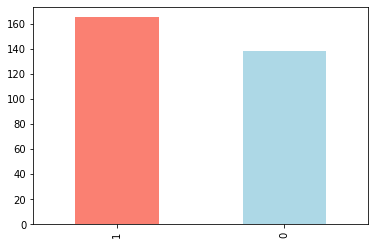

In [3]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Are there any missing values?
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex


In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
#compare target columns with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


# based on our exisiting dataset 72 out of 96 have heart disease which is approx 75%
# in male 93 out of 207 have heart disease; almost 50%
Therefore on an avg target is 62.5% chances of having heart disease

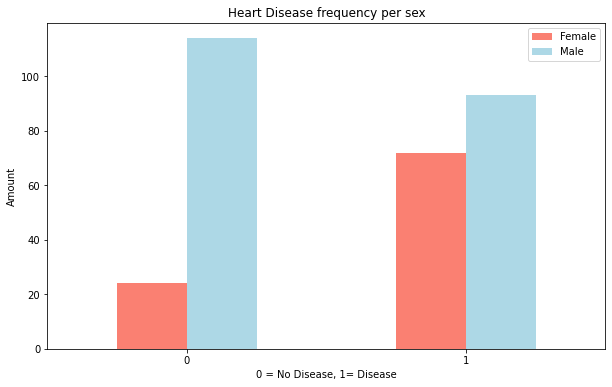

In [9]:
# Create a lot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])

plt.title("Heart Disease frequency per sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Lest compare age, thalach(Max heart rate) and target



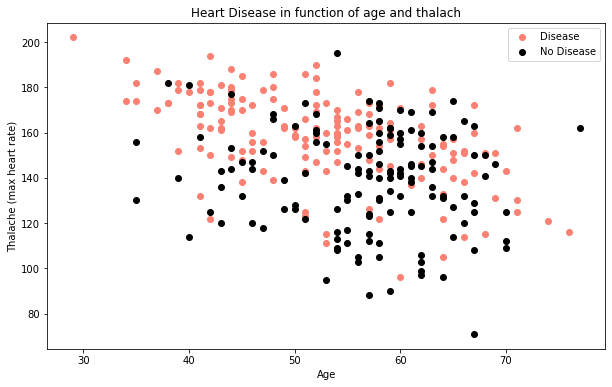

In [11]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

#scatter with negative example

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="black");

plt.title("Heart Disease in function of age and thalach")
plt.xlabel("Age")
plt.ylabel("Thalache (max heart rate)")
plt.legend(["Disease","No Disease"]);

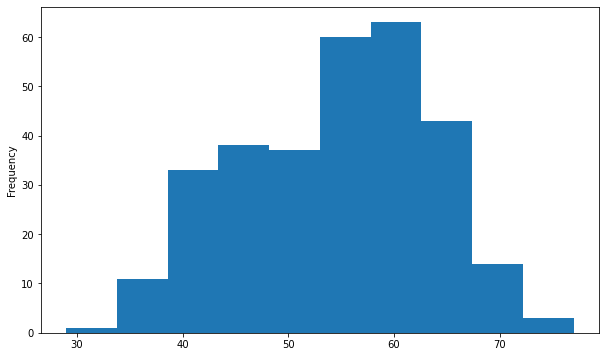

In [12]:
# check the dstribution of the age column with a histogram

df.age.plot.hist(figsize=(10,6));

## Lets check out chest pain type distribution
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [13]:
pd.crosstab( df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


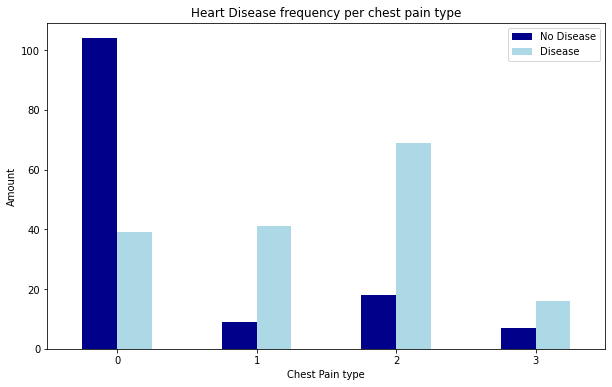

In [14]:
#make thr cross tab visual

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6),
                                  color=["darkblue","lightblue"])

plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [15]:
# Make a corelation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


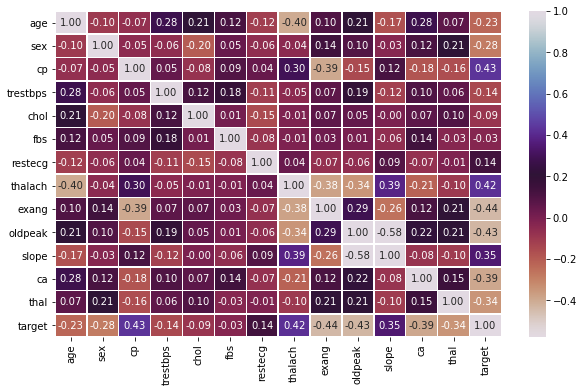

In [16]:
# Lets make our corelation matrix a bit prettier

corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(10,6))
ax= sns.heatmap(corr_matrix,
               annot= True,
               linewidths=0.5,
               fmt=".2f",
            cmap="twilight_r");

## 5. Modelling

In [17]:
#split data into X and y

X=df.drop("target", axis=1)
y=df["target"]

In [18]:
#split data into training and test split
np.random.seed(42)

#Split into trin and test set

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

In [19]:
len(X_train), len(y_train)

(242, 242)

### Now we've got our data in training and tests sets, its time to build a ML model using ML map and test, train and predict.
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

We are going to try 3 diff ML models
1. Logistic Regression : https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
2. K-nearest neighbour classifier
3. RandomForrestClassifier

In [20]:
# Put models in a dictionary

models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models,X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of diff SciKit learn ML models
    X_test :  test set (no label)
    X_train: training set (no label)
    y_train : training labels
    y_test : test labels
    """
    
    #set random seed
    np.random.seed(42)
    #Make dictionary to keep model scores
    
    model_scores={}
    
    #Loop through models
    for name, model in models.items():
        #fit model to data
        model.fit(X_train, y_train)
        #evaluate the model and store in score dict
        model_scores[name]= model.score(X_test, y_test)
    return model_scores

In [21]:
model_scores= fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)

model_scores

c:\Users\Lenovo\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

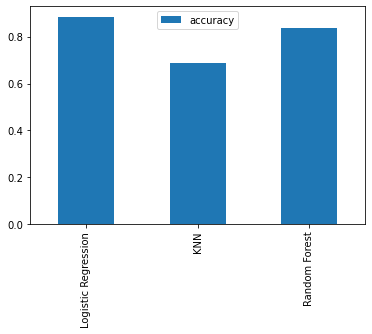

In [22]:
model_compare =pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know a model's first prediction is not something we must count on.
Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

## Hyper Parameter tuning (By hand)

In [23]:
#lets tune KNN
train_scores = []
test_scores =  []

#Create a list of diff values of n_neighbours
neighbors = range(1,21)

#Setup KNN Instance
knn = KNeighborsClassifier()

#Loop thriugh diff n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algo
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores
    test_scores.append(knn.score(X_test, y_test))
    

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data :75.41%


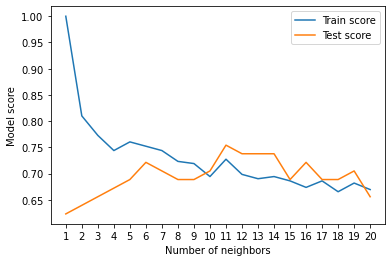

In [26]:
#Visualize

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data :{max(test_scores)*100:.2f}%")

### We have achieved an improvement in our KNN score as compared to 68% previously, now with hyperparameter tuning we 
### have got upto 75% when we use 11 neighbors.
Although it is an improvement but it is not close to the the other two models which had scores of 
{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Thus we can focus on other models and try tuning it to achive our goal which is 95% accuracy

## Hyperparameter tuning by RandomizedSearchCV

We are going to tune 
* LogisticRegresion model and 
* RandomForestClassifier 

using RandomizedSearchCV

In [27]:
#  Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
            "solver": ["liblinear"]}

#Create a hyperparam grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
         "max_depth" : [None,3,5,10],
         "min_samples_split" : np.arange(2, 20, 2),
         "min_samples_leaf": np.arange(1, 20, 2)}

Now grid is setup for models, lets us tune them using RandomizedSearchCV


In [28]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparams search for LogisticRegression

rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions = log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#Fit random hyperparam search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [31]:
# Now we have tuned for LogisticRegression
# Tune RandomFOrest

In [32]:
np.random.seed(42)

#Setup random hyperparam search for RandomFOrestClassifier
rs_ref = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter= 20,
                          verbose=True)
# Fit random hyperparam search model for RandomForestCLassifier

rs_ref.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
#Finding best params
rs_ref.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
#Evaluate RandomSearchCV search on RandomForestClassifier model
rs_ref.score(X_test, y_test)

0.8688524590163934

{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}

This tuning has improved our score from 83.60 to 86.88 but our LogisticRegression has more accuracy

# Lets use GridSearchCV to exhaustively over specifed params
Since our LogisticRegression model offers the best accuracy scores so far, so we'll try to improve using GridSeacrhCV

In [36]:
# Different hyperparameters for LR Model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)
#Fit grid hyperparam search model

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# Evaluate GridSearchCV for LR model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluate our tuned ML classifier, beyond accuracy
* ROC Curve
* AUC Score
* Confusion matrix
* CLassification score
* Precision
* Recall
* F1 score
... and it would be great if CV was used wherever possible
TO make comparison and eval our trained model, we need to make predictions

In [40]:
# make predictions
y_preds=gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

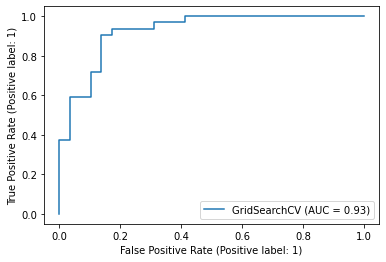

In [42]:
# Import ROC curve fucntion but we have done this previously.
#plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [43]:
# Confusion matrix
sns

<module 'seaborn' from 'c:\\Users\\Lenovo\\Desktop\\heart-disease-project\\env\\lib\\site-packages\\seaborn\\__init__.py'>

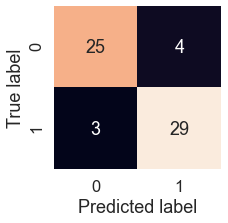

In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y__test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

# Now we have got out ROC curve and AUC matrics and confusion matric, Lets get Classification report
and cross validated precision, recall and F1 score

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrics using CV

precision, recall and F1 score of our model using cross_val_score

In [48]:
# check our best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# create a new claaifier with best params

clf= LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")
# Cross validated accuracy
cv_acc= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [52]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [53]:
# Cross validated precision
cv_precision= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision")

cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [54]:
# Cross validated recall
cv_recall= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="recall")

cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [55]:
# Cross validated recall
cv_f1= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross validated classification metrics'}>

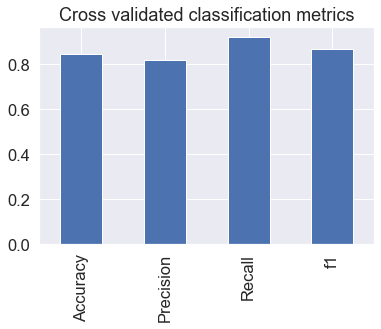

In [56]:
# putting it in a graph visualize 
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "f1": cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross validated classification metrics", legend=False)


## Feature importance

It is another way of asking which features contribute most to the outcome of the model and how did they contribute?

Finding fearure importance is diff for each ML model. oneway to find features which are important is by googling "Model name" feature importance.

Lets find the features important or our LogisticRegression model

In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
clf= LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

clf.fit(X_train, y_train);

In [63]:
#check coef attribute to give how each parameter contributes to our target labels
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [64]:
# Match the coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict


{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

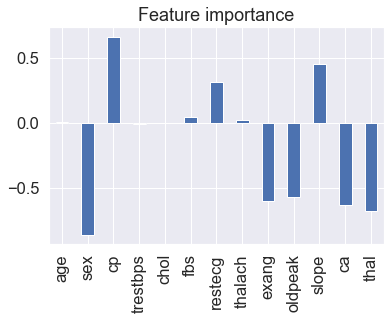

In [65]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [66]:
# if the value is -ve negative corelation

pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation

If you have not hit your evaluation metric yet, ask yourself:
* Could you collect more data/samples?
* Could try a better model? Like Catboost or XGBoost?
* Could you improve the current models?( beyond what we have done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share with others?
* Ask more questions, reachout, ask on stackoverflow